# Yelp API - Lab


## Introduction 

Now that we've seen how the Yelp API works and some basic Folium visualizations, it's time to put those skills to work in order to create a working map! Taking things a step further, you'll also independently explore how to perform pagination in order to retrieve a full results set from the Yelp API!

## Objectives

You will be able to: 
* Create HTTP requests to get data from Yelp API
* Parse HTTP responses and perform data analysis on the data returned
* Perform pagination to retrieve troves of data!
* Create a simple geographical system to view information about selected businesses, at a given location. 

## Problem Introduction

You've now worked with some API calls, but we have yet to see how to retrieve a more complete dataset in a programmatic manner. Returning to the Yelp API, the [documentation](https://www.yelp.com/developers/documentation/v3/business_search) also provides us details regarding the API limits. These often include details about the number of requests a user is allowed to make within a specified time limit and the maximum number of results to be returned. In this case, we are told that any request has a maximum of 50 results per request and defaults to 20. Furthermore, any search will be limited to a total of 1000 results. To retrieve all 1000 of these results, we would have to page through the results piece by piece, retrieving 50 at a time. Processes such as these are often referred to as pagination.

In this lab, you will define a search and then paginate over the results to retrieve all of the results. You'll then parse these responses as a DataFrame (for further exploration) and create a map using Folium to visualize the results geographically.

## Part I - Make the Initial Request

Start by making an initial request to the Yelp API. Your search must include at least 2 parameters: **term** and **location**. For example, you might search for pizza restaurants in NYC. The term and location is up to you but make the request below.

In [2]:
import json

def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [3]:
keys = get_keys("/Users/timsennett/.secret/yelp_api.json")

api_key = keys['api_key']

#While you may wish to print out these API keys to check that they imported properly,
#be sure to clear the output before uploading to Github. 
#Again, you don't want your keys stolen!!!

In [4]:
import requests

In [5]:
term = 'Chinese'
location = 'Steubenville OH'

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

url_params = {
                'term': term.replace(' ', '+'), # But there's no space here to replace. Ask Abhineet.
                'location': location.replace(' ', '+'),
            }

response = requests.get(url, headers=headers, params=url_params)
print(response)
print(type(response.text))
print(response.text)

<Response [200]>
<class 'str'>
{"businesses": [{"id": "3i_p_7hR1KxXz3Cvllc5RA", "alias": "hu-nan-chinese-restaurant-steubenville", "name": "Hu Nan Chinese Restaurant", "image_url": "https://s3-media4.fl.yelpcdn.com/bphoto/NHMoU1ebI1Ay3UMPr329bQ/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/hu-nan-chinese-restaurant-steubenville?adjust_creative=GBwDcPGcDYfGSJI1cVqdnQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GBwDcPGcDYfGSJI1cVqdnQ", "review_count": 22, "categories": [{"alias": "chinese", "title": "Chinese"}], "rating": 4.0, "coordinates": {"latitude": 40.3601893, "longitude": -80.6150119}, "transactions": [], "price": "$$", "location": {"address1": "106 N 4th St", "address2": "", "address3": "", "city": "Steubenville", "zip_code": "43952", "country": "US", "state": "OH", "display_address": ["106 N 4th St", "Steubenville, OH 43952"]}, "phone": "+17402828952", "display_phone": "(740) 282-8952", "distance": 4682.37695703422}, {"id": "GCfGAr-f7_tRJ

## Pagination

Now that you have an initial response, you can examine the contents of the JSON container. For example, you might start with ```response.json().keys()```. Here, you'll see a key for `'total'`, which tells you the full number of matching results given your query parameters. Write a loop (or ideally a function) which then makes successive API calls using the offset parameter to retrieve all of the results (or 5000 for a particularly large result set) for the original query. As you do this, be mindful of how you store the data. Your final goal will be to reformat the data concerning the businesses themselves into a pandas DataFrame from the json objects.

**Note: be mindful of the API rate limits. You can only make 5000 requests per day and are also can make requests too fast. Start prototyping small before running a loop that could be faulty. You can also use time.sleep(n) to add delays. For more details see https://www.yelp.com/developers/documentation/v3/rate_limiting.**

In [6]:
response.json()

{'businesses': [{'id': '3i_p_7hR1KxXz3Cvllc5RA',
   'alias': 'hu-nan-chinese-restaurant-steubenville',
   'name': 'Hu Nan Chinese Restaurant',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/NHMoU1ebI1Ay3UMPr329bQ/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/hu-nan-chinese-restaurant-steubenville?adjust_creative=GBwDcPGcDYfGSJI1cVqdnQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GBwDcPGcDYfGSJI1cVqdnQ',
   'review_count': 22,
   'categories': [{'alias': 'chinese', 'title': 'Chinese'}],
   'rating': 4.0,
   'coordinates': {'latitude': 40.3601893, 'longitude': -80.6150119},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '106 N 4th St',
    'address2': '',
    'address3': '',
    'city': 'Steubenville',
    'zip_code': '43952',
    'country': 'US',
    'state': 'OH',
    'display_address': ['106 N 4th St', 'Steubenville, OH 43952']},
   'phone': '+17402828952',
   'display_phone': '(740) 282-8952',
   'distance'

In [7]:
response.json().keys()

dict_keys(['businesses', 'total', 'region'])

In [8]:
response.json()['businesses']

[{'id': '3i_p_7hR1KxXz3Cvllc5RA',
  'alias': 'hu-nan-chinese-restaurant-steubenville',
  'name': 'Hu Nan Chinese Restaurant',
  'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/NHMoU1ebI1Ay3UMPr329bQ/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/hu-nan-chinese-restaurant-steubenville?adjust_creative=GBwDcPGcDYfGSJI1cVqdnQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GBwDcPGcDYfGSJI1cVqdnQ',
  'review_count': 22,
  'categories': [{'alias': 'chinese', 'title': 'Chinese'}],
  'rating': 4.0,
  'coordinates': {'latitude': 40.3601893, 'longitude': -80.6150119},
  'transactions': [],
  'price': '$$',
  'location': {'address1': '106 N 4th St',
   'address2': '',
   'address3': '',
   'city': 'Steubenville',
   'zip_code': '43952',
   'country': 'US',
   'state': 'OH',
   'display_address': ['106 N 4th St', 'Steubenville, OH 43952']},
  'phone': '+17402828952',
  'display_phone': '(740) 282-8952',
  'distance': 4682.37695703422},
 {'id': 'GCfGAr-

In [9]:
response.json()['total']

11

In [10]:
response.json()['region']

{'center': {'longitude': -80.66780090332031, 'latitude': 40.372659452126996}}

In [11]:
# Your code here; use a function or loop to retrieve all the results from your original request

# In my case, there's no need to write such a loop because there are only 11 results.
# If there were more than 50, then I'd only see the results in "pages" or batches of 50 at a time.
# That function might look something like this:


# import pandas as pd
# import time

# def yelp_call(url_params, api_key):
#     url = 'https://api.yelp.com/v3/businesses/search'
#     headers = {'Authorization': 'Bearer {}'.format(api_key)}
#     response = requests.get(url, headers=headers, params=url_params)
    
#     df = pd.DataFrame(response.json()['businesses'])
#     return df

# def all_results(url_params, api_key):
#     num = response.json()['total']
#     print('{} total matches found.'.format(num))
#     cur = 0
#     dfs = []
#     while cur < num and cur < 1000:
#         url_params['offset'] = cur
#         dfs.append(yelp_call(url_params, api_key))
#         time.sleep(1) #Wait a second
#         cur += 50
#     df = pd.concat(dfs, ignore_index=True)
#     return df

# term = 'Chinese'
# location = 'Steubenville OH'
# url_params = {  'term': term.replace(' ', '+'),
#                 'location': location.replace(' ', '+'),
#                 'limit' : 50
#              }
# df = all_results(url_params, api_key)
# print(len(df))
# df.head()

## Exploratory Analysis

Take the restaurants from the previous question and do an initial exploratory analysis. At minimum, this should include looking at the distribution of features such as price, rating and number of reviews as well as the relations between these dimensions.

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(response.json()['businesses'])

In [14]:
df

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,hu-nan-chinese-restaurant-steubenville,"[{'alias': 'chinese', 'title': 'Chinese'}]","{'latitude': 40.3601893, 'longitude': -80.6150...",(740) 282-8952,4682.376957,3i_p_7hR1KxXz3Cvllc5RA,https://s3-media4.fl.yelpcdn.com/bphoto/NHMoU1...,False,"{'address1': '106 N 4th St', 'address2': '', '...",Hu Nan Chinese Restaurant,+17402828952,$$,4.0,22,[],https://www.yelp.com/biz/hu-nan-chinese-restau...
1,sesame-grill-steubenville,"[{'alias': 'japanese', 'title': 'Japanese'}, {...","{'latitude': 40.373596, 'longitude': -80.614426}",(740) 282-6688,4507.152706,GCfGAr-f7_tRJlwE9zifVA,https://s3-media1.fl.yelpcdn.com/bphoto/Dwb0Ja...,False,"{'address1': '805 University Blvd', 'address2'...",Sesame Grill,+17402826688,$$,4.0,23,[],https://www.yelp.com/biz/sesame-grill-steubenv...
2,hong-kong-steubenville,"[{'alias': 'chinese', 'title': 'Chinese'}]","{'latitude': 40.368283525964, 'longitude': -80...",(740) 264-7598,2346.203235,tdLZ_OsxJ4FDUl-tsFzZkA,https://s3-media4.fl.yelpcdn.com/bphoto/CcjsYz...,False,"{'address1': '112 S Hollywood Blvd', 'address2...",Hong Kong,+17402647598,$,3.5,17,[],https://www.yelp.com/biz/hong-kong-steubenvill...
3,number-1-chinese-restaurant-steubenville,"[{'alias': 'chinese', 'title': 'Chinese'}]","{'latitude': 40.3693161, 'longitude': -80.6396...",(740) 264-4505,2481.619167,bmrGNOH-vuA1cLSriwzpDg,https://s3-media2.fl.yelpcdn.com/bphoto/WZs1Po...,False,"{'address1': '2132 Sunset Blvd', 'address2': '...",Number 1 Chinese Restaurant,+17402644505,$$,4.0,6,[],https://www.yelp.com/biz/number-1-chinese-rest...
4,new-hong-kong-follansbee,"[{'alias': 'chinese', 'title': 'Chinese'}]","{'latitude': 40.32723, 'longitude': -80.59552}",(304) 527-1838,7936.023136,GZnELK-sDLixfxDonM_uvQ,https://s3-media2.fl.yelpcdn.com/bphoto/QIEOaY...,False,"{'address1': '864 Main St', 'address2': '', 'a...",New Hong Kong,+13045271838,$,5.0,4,[],https://www.yelp.com/biz/new-hong-kong-follans...
5,home-made-buffet-steubenville,"[{'alias': 'buffets', 'title': 'Buffets'}, {'a...","{'latitude': 40.366655, 'longitude': -80.67297}",(740) 266-6699,798.462080,-sWw-zh5QLm9UMg6bo9d2w,https://s3-media1.fl.yelpcdn.com/bphoto/K6qN2U...,False,"{'address1': '100 Mall Dr', 'address2': '', 'a...",Home Made Buffet,+17402666699,$$,3.0,14,[],https://www.yelp.com/biz/home-made-buffet-steu...
6,new-china-garden-steubenville,"[{'alias': 'chinese', 'title': 'Chinese'}]","{'latitude': 40.3615306, 'longitude': -80.6143...",(740) 282-6333,4691.734876,azq3gC91sjLc6AvbB2dIgg,https://s3-media2.fl.yelpcdn.com/bphoto/w5bNSR...,False,"{'address1': '187 N 4th St', 'address2': '', '...",New China Garden,+17402826333,$$,1.5,4,[],https://www.yelp.com/biz/new-china-garden-steu...
7,dragons-palace-weirton,"[{'alias': 'chinese', 'title': 'Chinese'}]","{'latitude': 40.4092789, 'longitude': -80.5451...",(304) 723-5390,11145.194364,E8i70xdUS3wSFilyk1fPew,https://s3-media1.fl.yelpcdn.com/bphoto/1mLdwo...,False,"{'address1': '271 Penco Rd', 'address2': '', '...",Dragon's Palace,+13047235390,$,4.0,20,[],https://www.yelp.com/biz/dragons-palace-weirto...
8,hong-kong-chinese-restaurant-weirton,"[{'alias': 'chinese', 'title': 'Chinese'}]","{'latitude': 40.4045524597168, 'longitude': -8...",(304) 748-0800,7602.848486,N7MTu-BeMM7n2by5S69O6g,,False,"{'address1': '3240 Main St', 'address2': '', '...",Hong Kong Chinese Restaurant,+13047480800,NaN,1.0,2,[delivery],https://www.yelp.com/biz/hong-kong-chinese-res...
9,new-china-toronto,"[{'alias': 'chinese', 'title': 'Chinese'}]","{'latitude': 40.4595795, 'longitude': -80.6053...",(740) 537-9833,10960.971863,L12rbavUM0ngOQppX-iAlg,,False,"{'address1': '715 Trenton St', 'address2': '',...",New China,+17405379833,$,5.0,1,[],https://www.yelp.com/biz/new-china-toronto?adj...


In [15]:
df.describe()

,distance,rating,review_count
count,11.000000,11.000000,11.000000
mean,6124.082598,3.454545,11.818182
std,3652.908169,1.273863,8.506682
min,798.462080,1.000000,1.000000
25%,3494.385937,3.000000,4.000000
50%,4691.734876,4.000000,14.000000
75%,9074.172423,4.000000,18.500000
max,11145.194364,5.000000,23.000000


In [16]:
# for x in df:
#     df['price_scale'] = None
#     if x.price == "$":
#         df['price_scale'] == 1
#     if x.price == "$$":
#         df['price_scale'] == 2
#     if x.price == "$$$":
#         df['price_scale'] == 3
#     if x.price == "$$$$":
#         df['price_scale'] == 4
#     else:
#         df['price_scale'] == "Unknown"

# The above doesn't work as written.
# In any case, the following approach works much better and more efficiently:

df.price = df.price.fillna(value=0)
price_dict = {"$": 1, "$$":2, "$$$": 3, "$$$$":4}
df.price = df.price.map(price_dict)

In [17]:
df.describe()

# Now includes price stats.

,distance,price,rating,review_count
count,11.000000,10.000000,11.000000,11.000000
mean,6124.082598,1.600000,3.454545,11.818182
std,3652.908169,0.516398,1.273863,8.506682
min,798.462080,1.000000,1.000000,1.000000
25%,3494.385937,1.000000,3.000000,4.000000
50%,4691.734876,2.000000,4.000000,14.000000
75%,9074.172423,2.000000,4.000000,18.500000
max,11145.194364,2.000000,5.000000,23.000000


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

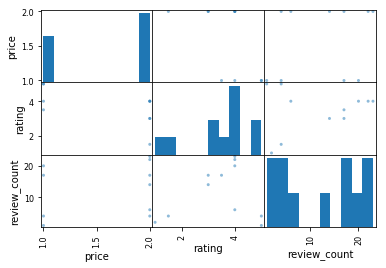

In [19]:
pd.plotting.scatter_matrix(df[['price', 'rating', 'review_count']])
plt.show()

## Mapping

Look at the initial Yelp example and try and make a map using Folium of the restaurants you retrieved. Be sure to also add popups to the markers giving some basic information such as name, rating and price.

In [26]:
list(df.coordinates[0].values())[0]

40.3601893

In [27]:
# lat = []
# lon = []

# for x in df.coordinates:
#     lat.append(list(df.coordinates[x].values())[0])
#     lon.append(list(df.coordinates[x].values())[1])

# print(lat)
# print(lon)

# Well, I'm getting a confusing error message with my approach. Why?
# No more time to waste.

In [28]:
import folium

lat_long = df['coordinates'].iloc[0]
lat = lat_long['latitude']
long = lat_long['longitude']
yelp_map = folium.Map([lat, long])

for row in df.index:
    try:
        lat_long = df['coordinates'][row]
        lat = lat_long['latitude']
        long = lat_long['longitude']
        name = df['name'][row]
        rating = df['rating'][row]
        price = df['price'][row]
        details = "{}\nPrice: {} Rating:{}".format(name,str(price),str(rating))
        popup = folium.Popup(details, parse_html=True)
        marker = folium.Marker([lat, long], popup=popup)
        marker.add_to(yelp_map)
    except:
        print('Hit error on row: {}'.format(row))
yelp_map

# Never used try and except before. Ask about that with Abhineet.

## Summary

Nice work! In this lab, you synthesized your skills for the day, making multiple API calls to Yelp in order to paginate through a results set, performing some basic exploratory analysis and then creating a nice map visual to display the results! Well done!